In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Customer-Churn-Prediction.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df[df.isna().any(axis=1)] # show NAN Value Rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [6]:
df[df['TotalCharges'].isna()] # show NAN Value Rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [7]:
df[df['TotalCharges'].isnull()]   # show NAN Value Rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [8]:
median_value=df['TotalCharges'].median()
df['TotalCharges'].fillna(median_value,inplace=True)

In [9]:
df.shape

(7043, 21)

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [12]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [13]:
1869/(5174+1869)

0.2653698707936959

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

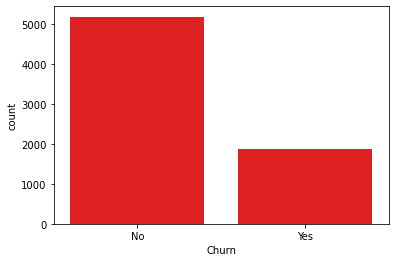

In [14]:
sns.countplot(df['Churn'],color='red')

# Basic Visualisation using Seaborn

<AxesSubplot:xlabel='gender', ylabel='count'>

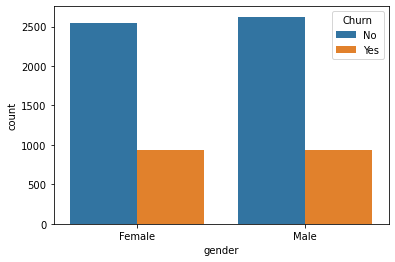

In [15]:
sns.countplot(x='gender',hue='Churn',data=df)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

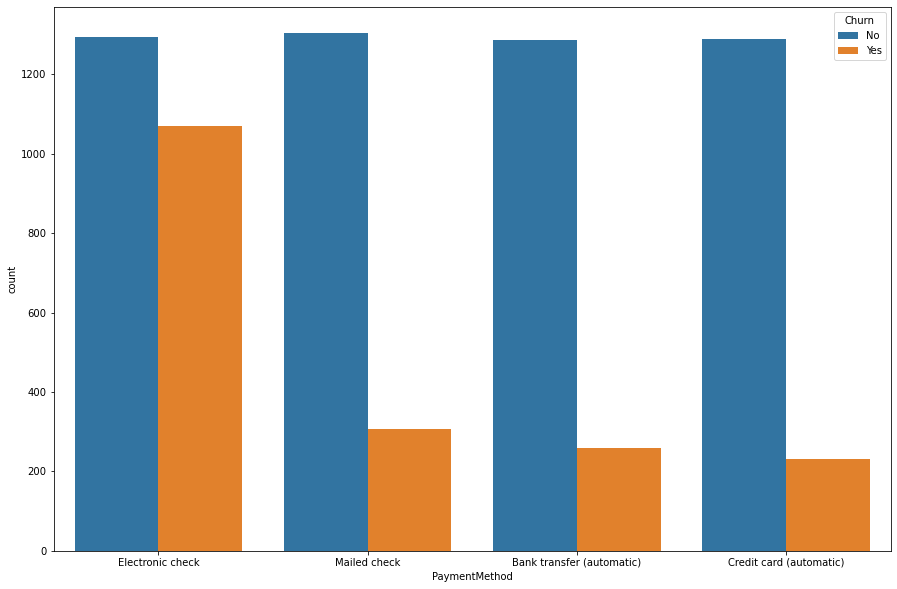

In [16]:
plt.subplots(figsize=(15,10))
sns.countplot(x='PaymentMethod',hue='Churn',data=df)

# Drop Customer ID

In [17]:
df.drop('customerID',axis=1,inplace=True)

# Encoding Data

In [18]:
from sklearn.preprocessing import LabelEncoder
from pandas.api.types import is_numeric_dtype

In [19]:
le=LabelEncoder()

In [20]:
cols=df.columns

In [21]:
for col in cols:
    if is_numeric_dtype(df[col]):
        continue
    else:
        df[col]=le.fit_transform(df[col])
        

In [22]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Seperate X and Y

In [23]:
X_nor=df.drop('Churn',axis=1)

In [24]:
Y_nor=df['Churn']

# Imbalance Data Handling

In [25]:
X_nor.shape

(7043, 19)

In [26]:
X_nor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [27]:
X_nor.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162289,0.483033,0.299588,32.370865,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985660,0.992475,0.690473,0.592219,1.574329,64.761692,2281.916928
std,0.500013,0.368742,0.499748,0.458110,24.559231,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885007,0.885091,0.833755,0.491457,1.068104,30.090047,2265.270398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000


In [28]:
Y_nor.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [29]:
NotChurn=5174/(5174+1869)*100
Churned=1869/(5174+1869)*100

In [30]:
NotChurn


73.4630129206304

In [31]:
Churned

26.536987079369588

Over Sampling

In [32]:
!pip install imblearn

# Over Sampling Technique 
1. Random Over Sampling 2.SMOTE 3. Border Line SMOTE 4.KMeans SMOTE 5. SVM SMOTE 6. ADASYN 7. SMOTE-NC 

# 2.SMOTE stands for Synthetic Minority Oversampling Technique.

# Combination of Over sampling and under sampling Technique
1. SMOTE with Tomek
2. SMOTE with ENN

# SMOTE with Tomek

In [33]:
from imblearn.combine import SMOTETomek

In [34]:
sm=SMOTETomek(random_state=42)

In [35]:
X_smt,Y_smt=sm.fit_resample(X_nor,Y_nor)

In [36]:
X_smt.shape

(9604, 19)

In [37]:
Y_smt.shape

(9604,)

In [38]:
Y_smt.value_counts()

0    4802
1    4802
Name: Churn, dtype: int64

# Under sampling Technique
1. Cluster Centroid 2. Random Under Sampling (1st Near Miss, 2nd Near Miss, 3rd Near Miss) 3. Condensed nearest neighbors (CNN)
4. Tomek Link 5. Edited Nearest Neibor (ENN) 

# Cluster Centroids Under sampling
ClusterCentroids makes use of K-means to reduce the number of samples. Therefore, each class will be synthesized with the centroids of the K-means method instead of the original samples:
ClusterCentroids offers an efficient way to represent the data cluster with a reduced number of samples. Keep in mind that this method requires that your data are grouped into clusters. In addition, the number of centroids should be set such that the under-sampled clusters are representative of the original one.

In [39]:
from imblearn.under_sampling import ClusterCentroids

In [40]:
cc=ClusterCentroids(random_state=100)

In [41]:
X_Cluster,Y_Cluster=cc.fit_resample(X_nor,Y_nor)

In [42]:
Y_Cluster.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

# Near Miss 

In [43]:
from imblearn.under_sampling import NearMiss

In [44]:
nm=NearMiss()
X_nm,Y_nm=nm.fit_resample(X_nor,Y_nor)

In [45]:
Y_nm.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

# Accuracy Before Cross Validation

In [46]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(X_nor,Y_nor,test_size=.30,random_state=42)

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
clf=DecisionTreeClassifier()

In [50]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

[Text(0.6887241380039232, 0.98, 'X[14] <= 0.5\ngini = 0.387\nsamples = 4930\nvalue = [3635, 1295]'),
 Text(0.4701015304914579, 0.94, 'X[8] <= 0.5\ngini = 0.488\nsamples = 2690\nvalue = [1553, 1137]'),
 Text(0.24996602866999074, 0.9, 'X[4] <= 10.5\ngini = 0.5\nsamples = 1811\nvalue = [888, 923]'),
 Text(0.12017516523654917, 0.86, 'X[7] <= 0.5\ngini = 0.465\nsamples = 885\nvalue = [325, 560]'),
 Text(0.08361718266852196, 0.82, 'X[18] <= 331.725\ngini = 0.5\nsamples = 353\nvalue = [181, 172]'),
 Text(0.061482973871366725, 0.78, 'X[17] <= 55.15\ngini = 0.496\nsamples = 291\nvalue = [133, 158]'),
 Text(0.04396161873840445, 0.74, 'X[15] <= 0.5\ngini = 0.488\nsamples = 248\nvalue = [105, 143]'),
 Text(0.027442795299938157, 0.7, 'X[9] <= 1.0\ngini = 0.5\nsamples = 114\nvalue = [58, 56]'),
 Text(0.02025355596784168, 0.66, 'X[17] <= 45.625\ngini = 0.497\nsamples = 93\nvalue = [43, 50]'),
 Text(0.015769944341372914, 0.62, 'X[13] <= 1.0\ngini = 0.494\nsamples = 65\nvalue = [36, 29]'),
 Text(0.0145

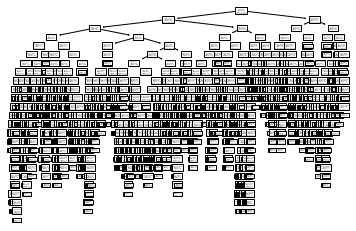

In [51]:
tree.plot_tree(clf)

In [52]:
Y_pred=clf.predict(X_test)

In [53]:
metrics.accuracy_score(Y_test,Y_pred)

0.7340274491244676

In [54]:
clf.score(X_test,Y_test)

0.7340274491244676

# Cross Validation: 
    1. Holdout Cross Validation 2. K-fold cross Validation
    3 Stratified K-fold cross validation 4. Leave One Out cross validation

# 1. Holdout Cross Validation

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [56]:
X_strain,X_stest,Y_strain,Y_stest=train_test_split(X_smt,Y_smt,test_size=.30,random_state=42)

In [57]:
clf_smt=DecisionTreeClassifier()

In [58]:
clf_smt.fit(X_strain,Y_strain)

DecisionTreeClassifier()

In [59]:
clf_smt.score(X_stest,Y_stest)

0.7956280360860514

In [60]:
Y_spred=clf_smt.predict(X_stest)

In [61]:
metrics.accuracy_score(Y_stest,Y_spred)

0.7956280360860514

# 2. K_fold Cross Validatin before OverSampling

In [62]:
from sklearn.model_selection import KFold,cross_val_score,cross_validate

In [63]:
kfold=KFold(n_splits=4,shuffle=True,random_state=100)

In [64]:
score=cross_val_score(clf,X_nor,Y_nor,cv=kfold) #cv=Cross Validation

In [65]:
score

array([0.70641681, 0.74389551, 0.73083475, 0.71818182])

In [66]:
score.mean()

0.724832223426772

# 2. K_fold Cross Validatin aftre OverSampling

In [67]:
K_score=cross_val_score(clf,X_smt,Y_smt,cv=kfold) #cv=Cross Validation

In [68]:
K_score

array([0.80674719, 0.80966264, 0.818409  , 0.80882965])

In [69]:
K_score.mean()

0.8109121199500209

# 3. Straitified Cross Validation

In [70]:
from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score,cross_validate

In [71]:
skfold=StratifiedKFold(n_splits=4,shuffle=True,random_state=100)

In [72]:
sk_score=cross_val_score(clf,X_smt,Y_smt,cv=skfold) #cv=Cross Validation

In [73]:
sk_score

array([0.80216576, 0.8000833 , 0.80216576, 0.82215743])

In [74]:
sk_score.mean()

0.806643065389421

# 4. Leave One Out Cross Validation

In [75]:
from sklearn.model_selection import LeaveOneOut

In [76]:
le=LeaveOneOut()

In [77]:
le_score=cross_val_score(clf,X_smt,Y_smt,cv=le) #cv=Cross Validation

In [78]:
le_score

array([1., 1., 1., ..., 1., 1., 1.])

In [79]:
le_score.mean()

0.8134110787172012